In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#!pip install pandas
#!pip install matplotlib

# Sequential Timings

In [17]:
seq_timings = pd.read_csv('kernel_3x3_00/sequential.csv')
# video_path,k,res,microseconds
video_paths = seq_timings['video_path'].tolist()
microseconds = seq_timings['microseconds'].tolist()

T_seq = {}

for video, microseconds_list in zip(video_paths, microseconds):
    microseconds_measurements = [float(x) for x in microseconds_list.split('|')]
    print(video)
    print('Number of measurements:',len(microseconds_measurements))
    
    avg_microseconds = sum(microseconds_measurements) / len(microseconds_measurements)
    variance = sum([(x - avg_microseconds)**2 for x in microseconds_measurements]) / len(microseconds_measurements)
    std_dev = variance**0.5
    print('Avg microseconds:',avg_microseconds,'Avg seconds:',avg_microseconds / 1000000)
    print('Std microseconds:',std_dev,'Std seconds:',std_dev / 1000000)

    T_seq[video] = avg_microseconds
    print('------------------------------')

videos/small_video.mp4
Number of measurements: 3
Avg microseconds: 985911.0 Avg seconds: 0.985911
Std microseconds: 21020.514757414167 Std seconds: 0.021020514757414167
------------------------------
videos/large_video.mp4
Number of measurements: 3
Avg microseconds: 9487655.0 Avg seconds: 9.487655
Std microseconds: 925661.3461199871 Std seconds: 0.9256613461199871
------------------------------


# Thread

In [18]:
thread_timings = pd.read_csv('kernel_3x3_00/thread.csv')
# video_path,k,res,threads,microseconds
video_paths = thread_timings['video_path'].tolist()
threads = thread_timings['threads'].tolist()
microseconds = thread_timings['microseconds'].tolist()

T_thread = {} # map video_path to a map of threads to avg microseconds

for video, numberOfThreads, microseconds_list in zip(video_paths, threads, microseconds):
    microseconds_measurements = [float(x) for x in microseconds_list.split('|')]
    print(video)
    print('Number of measurements:',len(microseconds_measurements))
    print('Number of threads:',numberOfThreads)
    avg_microseconds = sum(microseconds_measurements) / len(microseconds_measurements)
    variance = sum([(x - avg_microseconds)**2 for x in microseconds_measurements]) / len(microseconds_measurements)
    std_dev = variance**0.5
    print('Avg microseconds:',avg_microseconds,'Avg seconds:',avg_microseconds / 1000000)
    print('Std microseconds:',std_dev,'Std seconds:',std_dev / 1000000)

    if video not in T_thread:
        T_thread[video] = {}
    T_thread[video][numberOfThreads] = avg_microseconds
    print('------------------------------')

videos/small_video.mp4
Number of measurements: 3
Number of threads: 1
Avg microseconds: 548032.0 Avg seconds: 0.548032
Std microseconds: 10375.156769899913 Std seconds: 0.010375156769899913
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 2
Avg microseconds: 573607.0 Avg seconds: 0.573607
Std microseconds: 27404.081849242822 Std seconds: 0.027404081849242822
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 3
Avg microseconds: 566089.3333333334 Avg seconds: 0.5660893333333333
Std microseconds: 17722.13381308495 Std seconds: 0.01772213381308495
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 4
Avg microseconds: 559309.6666666666 Avg seconds: 0.5593096666666666
Std microseconds: 20808.547672103938 Std seconds: 0.02080854767210394
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 5
Avg microse

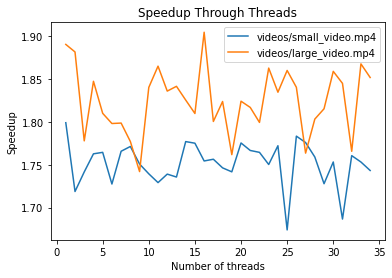

In [19]:
speedups = {}
for video in T_seq:
    speedups[video] = {}
    for thread in T_thread[video]:
        speedups[video][thread] = T_seq[video] / T_thread[video][thread]
    # plot speedups
    plt.plot(list(speedups[video].keys()),list(speedups[video].values()), label=video)
plt.legend()
plt.title('Speedup Through Threads')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.show()

# FastFlow

In [13]:
thread_timings = pd.read_csv('kernel_9x9_10/fastflow.csv')
# video_path,k,res,threads,microseconds
video_paths = thread_timings['video_path'].tolist()
threads = thread_timings['threads'].tolist()
microseconds = thread_timings['microseconds'].tolist()

T_fastflow = {} # map video_path to a map of threads to avg microseconds

for video, numberOfThreads, microseconds_list in zip(video_paths, threads, microseconds):
    microseconds_measurements = [float(x) for x in microseconds_list.split('|')]
    print(video)
    print('Number of measurements:',len(microseconds_measurements))
    print('Number of threads:',numberOfThreads)
    avg_microseconds = sum(microseconds_measurements) / len(microseconds_measurements)
    variance = sum([(x - avg_microseconds)**2 for x in microseconds_measurements]) / len(microseconds_measurements)
    std_dev = variance**0.5
    print('Avg microseconds:',avg_microseconds,'Avg seconds:',avg_microseconds / 1000000)
    print('Std microseconds:',std_dev,'Std seconds:',std_dev / 1000000)

    if video not in T_fastflow:
        T_fastflow[video] = {}
    T_fastflow[video][numberOfThreads] = avg_microseconds
    print('------------------------------')

videos/small_video.mp4
Number of measurements: 3
Number of threads: 1
Avg microseconds: 4989498.333333333 Avg seconds: 4.989498333333333
Std microseconds: 712311.7933678263 Std seconds: 0.7123117933678262
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 2
Avg microseconds: 4085313.0 Avg seconds: 4.085313
Std microseconds: 13374.82979330952 Std seconds: 0.01337482979330952
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 3
Avg microseconds: 2728176.3333333335 Avg seconds: 2.7281763333333333
Std microseconds: 5956.0133385418885 Std seconds: 0.0059560133385418886
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of threads: 4
Avg microseconds: 2047011.3333333333 Avg seconds: 2.0470113333333333
Std microseconds: 11746.118063239257 Std seconds: 0.011746118063239257
------------------------------
videos/small_video.mp4
Number of measurements: 3
Number of th

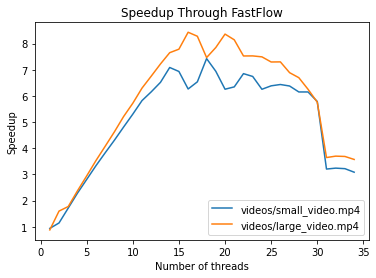

In [14]:
speedups = {}
for video in T_seq:
    speedups[video] = {}
    for thread in T_fastflow[video]:
        speedups[video][thread] = T_seq[video] / T_fastflow[video][thread]
    # plot speedups
    plt.plot(list(speedups[video].keys()),list(speedups[video].values()), label=video)
plt.legend()
plt.title('Speedup Through FastFlow')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.show()